# Reproduce Tables & Figures
_Generated: 2025-10-17_

This notebook demonstrates the full evaluation protocol on **synthetic data** (no datasets required):
1. Runs the end-to-end synthetic demo.
2. Loads outputs from `out/`.
3. Displays fusion results and bootstrap confidence intervals.


In [1]:
import os, sys, subprocess, json, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
print('Python:', sys.version)
print('CWD:', os.getcwd())


Python: 3.11.7 (main, Dec  8 2023, 18:56:58) [GCC 11.4.0]
CWD: /notebooks/wildfire-repro


## 1) Run the synthetic demo
This mirrors the CLI steps in the README and writes CSV/JSON to `out/`.

In [4]:
import os, sys, subprocess
# ensure we're at repo root
from pathlib import Path
if Path.cwd().name == "notebooks":  # if you’re inside notebooks/
    os.chdir(Path.cwd().parent)

# (optional) set PYTHONPATH anyway—never hurts
os.environ["PYTHONPATH"] = os.getcwd()

# run as a module so relative imports definitely work
subprocess.check_call([sys.executable, "-m", "scripts.run_synthetic_demo"])
print("Done. Outputs in ./out")



Saved splits to out/splits.json
Saved fusion results to out/fusion_results.json
Saved bootstrap CIs to out/bootstrap_ci.json
Wrote out/fusion_table.csv
Synthetic demo complete. See out/*.csv and out/*.json
Done. Outputs in ./out


## 2) Load fusion table

In [5]:
fusion_df = pd.read_csv('out/fusion_table.csv')
fusion_df


,Model,AUROC,Brier,ECE,Acc,F1
0,best_metrics,0.732334,0.220674,0.134032,0.634000,0.607577
1,weighted,0.734121,0.226073,0.157179,0.662667,0.625185
2,stacking,0.774144,0.185445,0.043290,0.724667,0.602502


## 3) Load bootstrap CI results and show a quick chart

In [6]:
with open('out/bootstrap_ci.json') as f:
    ci = json.load(f)
ci


{'auroc': [0.7340338116981476, 0.7207255005084586, 0.7471056937601606],
 'brier': [0.21958011785853188, 0.21616261691376468, 0.22302971742561967],
 'ece': [0.11199672864255035, 0.0961511081031968, 0.1295454785992536],
 'eo': [0.10787298769814647, 0.06720783497286847, 0.14983986802130705]}

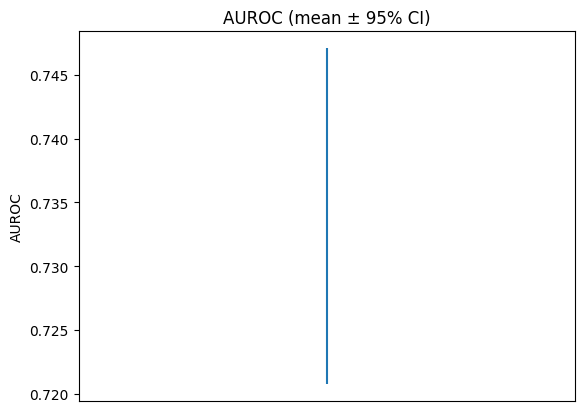

In [7]:
vals = ci['auroc']  # [mean, lo, hi]
mean_auc, lo, hi = vals
err_lo = mean_auc - lo
err_hi = hi - mean_auc
plt.figure()
plt.errorbar([0],[mean_auc], yerr=[[err_lo],[err_hi]])
plt.title('AUROC (mean ± 95% CI)')
plt.ylabel('AUROC')
plt.xticks([])
plt.show()
